### Linearity

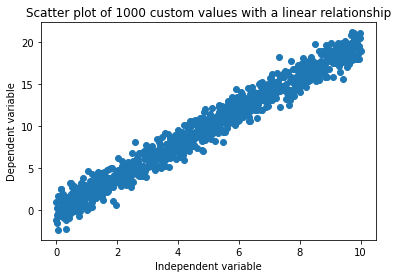

In [1]:
# Import Basic Packages
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 custom values with a linear relationship
np.random.seed(123)
x = np.linspace(0, 10, num=1000)
y = 2*x + np.random.normal(loc=0, scale=1, size=1000)    # with some random noise

# loc: This specifies the mean of the distribution. In this case, it is set to 0.
# scale: This specifies the standard deviation of the distribution. In this case, it is set to 1.
# size: This specifies the number of samples to generate. In this case, it is set to 200.

# Visualize the data in a scatter plot
plt.scatter(x, y)
plt.title('Scatter plot of 1000 custom values with a linear relationship')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [2]:
# Check linearity using correlation coefficients
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)
print('Correlation coefficient:', corr)
print('p-value:', p_value)

Correlation coefficient: 0.9851961071699518
p-value: 0.0


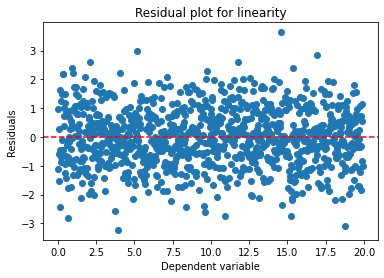

In [3]:
# Check linearity using residual plots
from statistics import mean
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
resid = y - y_pred
plt.scatter(y_pred, resid)
plt.axhline(y=mean(resid), color='r', linestyle='--')  # add horizontal line at y=0
plt.xlabel('Dependent variable')
plt.ylabel('Residuals')
plt.title('Residual plot for linearity')
plt.show()

### Normality of Residuals

In [4]:
# Import Basic Packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Generate some random data for linear regression
np.random.seed(123)
X = np.random.uniform(0, 10, 1000)
y = 2 * X + 3*np.random.normal(size=1000)

In [5]:
# Fit a linear regression model
model = LinearRegression().fit(X.reshape(-1, 1), y)

# Predict y values using the fitted model
y_pred = model.predict(X.reshape(-1, 1))

# Calculate the residuals
residuals = y - y_pred

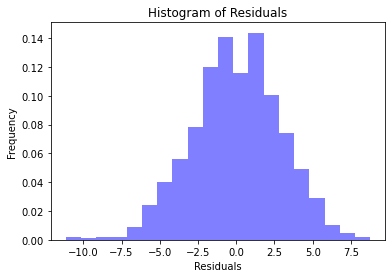

In [6]:
# Create a histogram of the residuals
plt.hist(residuals, bins=20, density=True, alpha=0.5, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

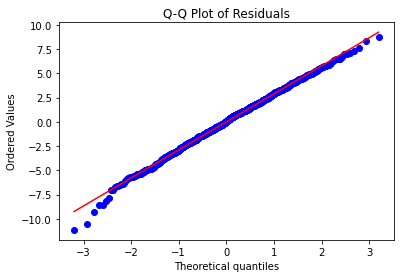

In [7]:
# Create a Q-Q plot of the residuals
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [8]:
# Perform Shapiro-Wilk test for normality
w_stat, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk test for normality: W = {w_stat:.4f}, p-value = {p_value:.4f}')
if p_value < 0.05:
    print('The residuals do not follow a normal distribution')
else:
    print('The residuals follow a normal distribution')

Shapiro-Wilk test for normality: W = 0.9977, p-value = 0.1880
The residuals follow a normal distribution


### Outliers

In [9]:
# Import Basic Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some data with outliers
data = np.concatenate([np.random.normal(loc=10, scale=2, size=50), np.random.normal(loc=50, scale=10, size=5)])

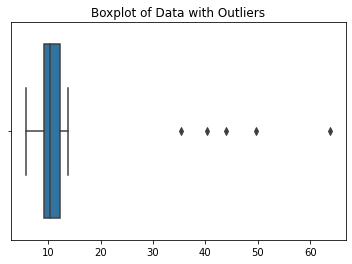

In [10]:
# Create a boxplot to visualize outliers
sns.boxplot(x=data)

# Add a title to the plot
plt.title("Boxplot of Data with Outliers")

# Show the plot
plt.show()

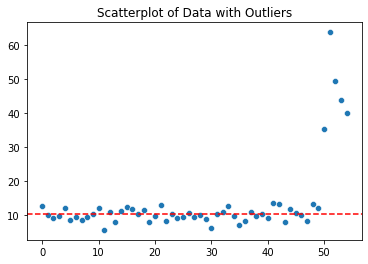

In [11]:
# Create a scatterplot to visualize outliers
sns.scatterplot(x=range(len(data)), y=data)

# Add a horizontal line at the median value
plt.axhline(np.median(data), color='r', linestyle='--')

# Add a title to the plot
plt.title("Scatterplot of Data with Outliers")

# Show the plot
plt.show()

### Multicollinearity

In [12]:
# Import Basic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate custom dataset with multicollinearity
np.random.seed(42)
n = 1000
x1 = np.random.normal(size=n)
x2 = x1 + np.random.normal(size=n)
x3 = 2*x1 + np.random.normal(size=n)
y = 3*x1 + 5*x2 + np.random.normal(size=n)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

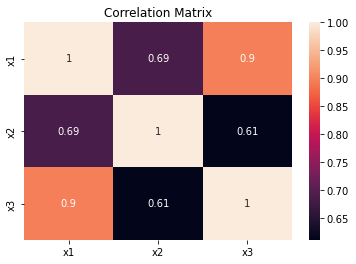

In [13]:
# Extract predictor variables and calculate correlation matrix
X = df.drop('y', axis=1)
corr_matrix = X.corr()

# Visualize correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

# Show the plots
plt.show()

In [14]:
# Calculate VIFs for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif = vif.round(2)
print(vif)

   VIF Factor Features
0        5.98       x1
1        1.89       x2
2        5.06       x3


### Homoscedasticity

In [15]:
# Import Basic packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some sample data with homoscedastic errors
np.random.seed(1)
X = np.random.randn(100, 1)
y = 2*X + np.random.randn(100, 1)*0.5

In [16]:
# Fit a linear regression model
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Calculate residuals
residuals = y - y_pred

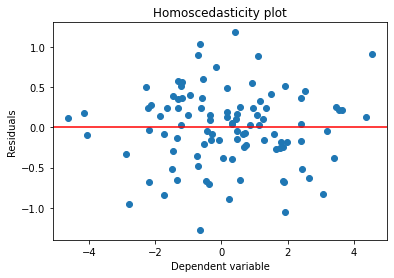

In [17]:
# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Dependent variable')
plt.ylabel('Residuals')
plt.title('Homoscedasticity plot')
plt.show()

### Independence of Residuals

In [18]:
# Import Basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some random data
np.random.seed(123)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

In [19]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Calculate residuals
residuals = y - y_pred

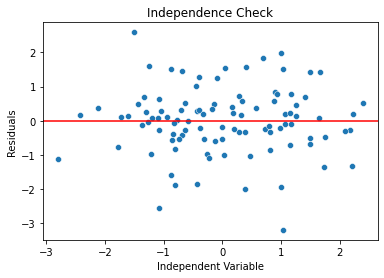

In [20]:
# Plot the residuals against the predictor variable
sns.scatterplot(x=x, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.title('Independence Check')
plt.show()

In [53]:
# Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson test statistic
dw = durbin_watson(residuals)

# Print the test statistic
print('Durbin-Watson test statistic:', dw)

Durbin-Watson test statistic: 1.859803229200614


### Transformation Example with custom generated data

In [54]:
# Import Basic packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
# Generate some sample data with a nonlinear relationship
np.random.seed(123)
x = np.random.uniform(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

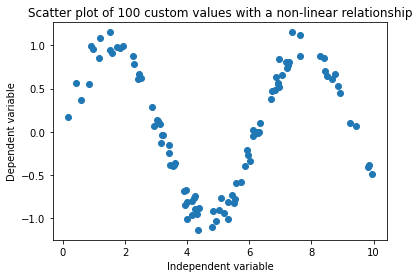

In [58]:
# Visualize the data in a scatter plot
plt.scatter(x, y)
plt.title('Scatter plot of 100 custom values with a non-linear relationship')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [59]:
# Apply a transformation to the x variable
x_transformed = np.sin(x)

In [60]:
# Fit a linear regression model to the transformed data
model = LinearRegression()
model.fit(x_transformed.reshape(-1, 1), y)

LinearRegression()

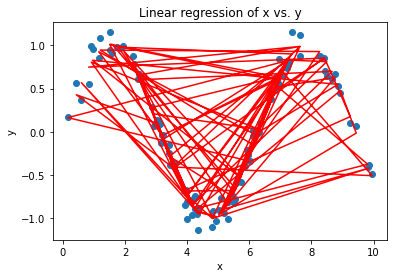

In [61]:
# prediction
y_pred = model.predict(x_transformed.reshape(-1, 1))

# Plot the data and the linear regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression of x vs. y')
plt.show()

In [62]:
# Calculate the R-squared value
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2:.4f}")

R-squared value: 0.9796
